In [2]:
import tushare as ts
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. Oil Index (collected: https://fred.stlouisfed.org/series/DCOILWTICO) (important since also mentioned in Ernest's book),
2. Dollar Index (collected: https://fred.stlouisfed.org/series/DTWEXB),
3. Gold Vol Index (collected: https://fred.stlouisfed.org/series/GVZCLS),
4. Moody's Aaa Corporate Bond Index (collected: https://fred.stlouisfed.org/series/DAAA),
5. VIX Index (collected: https://fred.stlouisfed.org/series/VIXCLS),
6. Consumer Confidence Measure (such as the Conference Board’s February survey) with other macro indexes (important, since mentioned also in the Ernest's book),
7. Times of hitting record high by several major stock market indexes,
8. Times of market trading price compare with its historical average earnings,
9. Years of lasting for the bull market compared with the historical average years of bull market right before each bear market,
10. Spread between short and long term T-bill (3-month and 10-year) compared with pre-2008 (collected: https://fred.stlouisfed.org/series/T10Y3M),
11. Job losses index and data: \"Unemployment Rate: Job Losers\": (collected: https://fred.stlouisfed.org/series/U2RATE),
12. Real Personal Consuming Expenditures including food and energy: (collected: https://fred.stlouisfed.org/series/PCEC96),
13. Real Personal Consuming Expenditures excluding food and energy: (collected: https://fred.stlouisfed.org/series/DPCCRX1M020SBEA),
14. Squeezing corporate profits *very useful in predicting big market drawdown: (collected: https://fred.stlouisfed.org/series/CP),
15. Conference Board’s Leading Economic Index,  which consists of 10 data points that predict future economic performance.
16. Quarterly GDP slowing down (collected: https://fred.stlouisfed.org/series/GDPC1),
17. Real Manufacturing Output: (Collected: https://fred.stlouisfed.org/series/OUTMS),
18. Servicing segments of the economy: (Collected: https://fred.stlouisfed.org/series/SRVPRD),
19. Major industry leaders' profits turning down for consecutive quarters
20. Wilshire 5000 Total Market Cap Price Index & market valuation: (Collected: https://fred.stlouisfed.org/series/WILL5000PRFC),
    (Collected: https://www.gurufocus.com/stock-market-valuations.php),
21. Financial distress condition index: (collected: https://fred.stlouisfed.org/series/NFCI),
21. Ones that do best when times are good, such as banks, transportation companies and businesses that sell stuff to consumers that isn’t needed for daily survival.
22. New housing starts: (Collected: https://fred.stlouisfed.org/series/NFCI)
23. A rising market driven by fewer and fewer stocks is a bearish sign. Clues  include more stocks going down than up on a daily basis and more stocks hitting 52-week lows than highs. “It is one of the most reliable bear market warning flags,” says Stack.
24. When the number of stocks hitting their lowest price levels in a year starts to swell, and if the new low list grows day after day, it’s a sign that the \"smart money,\" or professional investors, are bailing out of the market. “It means investors are becoming desperate to sell, even ... at a loss,” Stack says.
25. U.S. Retirement fund
26. Balance Sheet
27. U.S. Weekly Leading Index: (Collected: https://www.quandl.com/data/ECRI/USLEADING-U-S-Weekly-Leading-Index)
28. Household Debt to GDP: (Collected: https://fred.stlouisfed.org/series/HDTGPDUSQ163N?utm_source=series_page&utm_medium=related_content&utm_term=related_resources&utm_campaign=categories)
29. US Econ Coincident Index: (Collected: https://www.quandl.com/data/ECRI/USCOIN-U-S-Coincident-Index)
30. Put-call ratio on SPY\n",
31. Fed Reserve sentiment signals: https://www.quantopian.com/posts/does-federal-reserve-sentiment-predict-prices-of-macro-tracking-etfs
32. Inflation level: Trigger of the Feb 3, 2018 market crash
33. Cyclically adjusted price to earnings, https://www.rt.com/op-ed/418057-us-stock-crash-banks/
34. Increasing chatter about impending boom or bust may actually be a good predictor of a coming turning point. (suggested by Robert Schiller (2007), in Ernest's book Quant Trading)
35. Predict volatility regime change (to enter high/low regime) using GARCH model

In [3]:
from fredapi import Fred     
from datetime import datetime

In [10]:
# generate a series of interest rate
def fred_3mon_ir(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('DTB3', observation_start=start, observation_end=end)
    return s

# generate the most updated interest rate
def fred_3mon_ir_today(end = datetime.now()):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('DTB3', observation_end=end)
    return s[-1]/100

def fred_1r_ir_today(end = datetime.now()):
    if USE_API:
        fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
        s = fred.get_series('DGS1', observation_end=end)
        return s[-1]/100
    else:
        return 1.2/100

# fred_data('DTB3', '2012-09-02', '2014-09-05')

def ten_yr_rate(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('DGS10', observation_start=start, observation_end=end)
    return s

def three_fin_rate(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('DCPF3M', observation_start=start, observation_end=end)
    return s

def three_nonfin_rate(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('CPN3M', observation_start=start, observation_end=end)
    return s

def three_rate(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('TB3MS', observation_start=start, observation_end=end)
    return s

def fed_total_asset(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('WALCL', observation_start=start, observation_end=end)
    return s

def high_yield_rate(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('BAMLH0A0HYM2EY', observation_start=start, observation_end=end)
    return s

def spx(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('SP500', observation_start=start, observation_end=end)
    return s

def unemployment(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('UNRATE', observation_start=start, observation_end=end)
    return s

def cpi(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('CPIAUCSL', observation_start=start, observation_end=end)
    return s

def effective_fed_rate(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('FEDFUNDS', observation_start=start, observation_end=end)
    return s

# industrial production index
def ipi(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('INDPRO', observation_start=start, observation_end=end)
    return s

def m2(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('M2', observation_start=start, observation_end=end)
    return s

def ppi(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('PCUOMFGOMFG', observation_start=start, observation_end=end)
    return s

def gdp(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('A191RL1Q225SBEA', observation_start=start, observation_end=end)
    return s

def debt_to_equity(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('TOTDTEUSQ163N', observation_start=start, observation_end=end)
    return s

# import urllib.request, urllib.error, urllib.parse

def put_call(start, end):
    urlStr = 'http://www.cboe.com/publish/ScheduledTask/MktData/datahouse/totalpc.csv'
    df_ = pd.read_csv(urllib.request.urlopen(urlStr), header = 2, index_col=0,parse_dates=True)
    df = df_['P/C Ratio']
    return df[start:end]

def ten_yr_3_month_rate_sprd(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('T10Y3M', observation_start=start, observation_end=end)
    return s

In [17]:
start = "2000-01-01"
end = "2019-10-22"

une = unemployment(start, end)

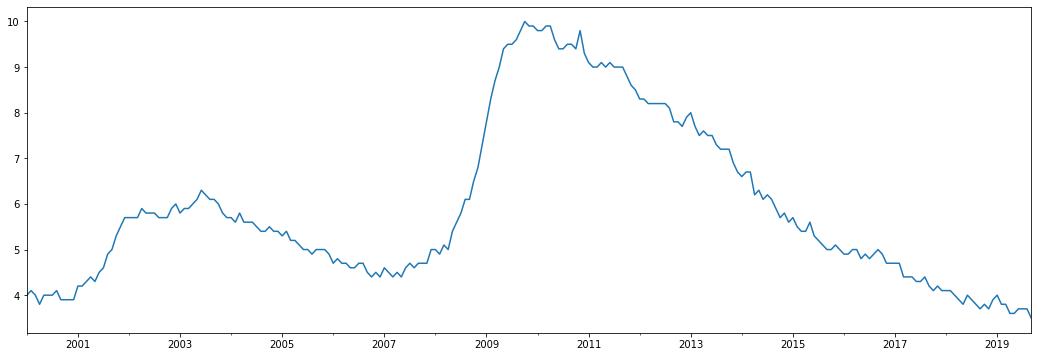

In [18]:
une.plot(figsize = (18,6))